In [ ]:
import random
import graycode
import matplotlib.pyplot as plt
import oapackage as oa
import numpy as np

def fitness(individual):
    x1, x2, x3, x4 = individual
    f1 = (-x1**3 + 4*x3**2 + 10*x4 +156.2399)/369.7137
    f2 = (x1**3 + 2*x2**2 + 10*x4 + 175)/340.4638
    return f1, f2

def is_valid(individual):
    x1, x2, x3, x4 = individual
    condition1 = x1**2 + 2*x2 + 6*x3**3 + 24*x4 <= 120
    condition2 = 6*x3**3 + 24*x4 >= -60
    condition3 = pow(x1,2) + 3*pow(x2,2) + 5*x3**2 + pow(x4,2) <= 150
    return condition1 and condition2 and condition3

def crossover(parent1, parent2, a_bound, b_bound,  power):
    # одноточечное скрещивание
    g_c = []
    str_pow = "{:0"+str(power)+"b}"
    for i in range(pow(2,power)):
        g_c.append(str_pow.format(graycode.tc_to_gray_code(i)))
    p1_0 = ((parent1[0]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    p1_1 = ((parent1[1]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    p1_2 = ((parent1[2]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    p1_3 = ((parent1[3]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    p2_0 = ((parent2[0]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    p2_1 = ((parent2[1]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    p2_2 = ((parent2[2]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    p2_3 = ((parent2[3]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    chr1 = g_c[int(p1_0)]+g_c[int(p1_1)]+g_c[int(p1_2)]+g_c[int(p1_3)]
    chr2 = g_c[int(p2_0)]+g_c[int(p2_1)]+g_c[int(p2_2)]+g_c[int(p2_3)]
    crossover_point = random.randint(0, 4*power-1)
    child1 = chr1[:crossover_point] + chr2[crossover_point:]
    child2 = chr2[:crossover_point] + chr1[crossover_point:]
    ch1 = []
    ch2 = []
    for i in range(4):
        ch1.append(a_bound+(g_c.index(child1[i*power:(i+1)*power])*2+1)*(b_bound-a_bound)/pow(2,power+1))
        ch2.append(a_bound+(g_c.index(child2[i*power:(i+1)*power])*2+1)*(b_bound-a_bound)/pow(2,power+1))
    return ch1, ch2

def mutate(individual, mutation_rate, a_bound, b_bound,  power):
    # мутация - изменение случайного гена индивида
    g_c = []
    str_pow = "{:0"+str(power)+"b}"
    for i in range(pow(2,power)):
        g_c.append(str_pow.format(graycode.tc_to_gray_code(i)))
    i_0 = ((individual[0]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    i_1 = ((individual[1]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    i_2 = ((individual[2]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    i_3 = ((individual[3]-a_bound)*pow(2,power+1)/(b_bound - a_bound) - 1)/2
    chr = g_c[int(i_0)]+g_c[int(i_1)]+g_c[int(i_2)]+g_c[int(i_3)]
    chr_str = []
    for i in range(len(chr)):
        chr_str.append(chr[i])
    mutated_individual = chr_str[:]
    for i in range(len(mutated_individual)):
        if random.random() < mutation_rate:
            if mutated_individual[i] == '0':
                mutated_individual[i] = '1'
            else:
                mutated_individual[i] = '0'
    m_i = []
    chr = []
    for i in range(4):
        chr_str = ""
        for j in range(power):
            chr_str += mutated_individual[i*power+j]
        chr.append(chr_str)
    for i in range(4):
        m_i.append(a_bound+(g_c.index(chr[i])*2+1)*(b_bound-a_bound)/pow(2,power+1))
    return m_i

def is_point_inside_polygon(x, y, polygon):
    n = len(polygon)
    inside = False
    p1x, p1y = polygon[0]
    
    for i in range(1, n + 1):
        p2x, p2y = polygon[i % n]
        
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xinters:
                            inside = not inside
        
        p1x, p1y = p2x, p2y
    
    return inside

def pareto_optimization(a_bound, b_bound, population_size, num_generations, mutation_rate, power, ratio, a1):
    # инициализация начальной популяции
    g_c = []
    str_pow = "{:0"+str(power)+"b}"
    for i in range(pow(2,power)):
        g_c.append(str_pow.format(graycode.tc_to_gray_code(i)))
    population = []
    for i in range(population_size):
        chromosome = []
        population.append(chromosome)
    for k in range(population_size): 
        for i in range(4*power):
            population[k].append(str(random.randint(0,1)))
    chr = []
    for i in range(population_size):
        chr.append(''.join(population[i]))
    x = []
    for k in range(population_size):
        x.append([])
        for i in range(4):
            ch = []
            for j in range(power):
                ch.append(population[k][i*power+j])
            c = ''.join(ch)
            x[k].append(a_bound+(g_c.index(c)*2+1)*(b_bound-a_bound)/pow(2,power+1))
    population = x
    children = []
    children_f = []
    a2 = 1-a1
    optimal_chr_previous = []
    counter_opt = 0
    valid_population = [ind for ind in population if is_valid(ind)]
    pop = []
    for val in population:
        if val not in pop:
            pop.append(val)
    val_pop = []
    for val in valid_population:
        if val not in val_pop:
            val_pop.append(val)
    if len(val_pop)/len(pop) < ratio:
        print("Интервал слишком большой. Введите другой интервал.")
    else:
        for _ in range(num_generations):
            print("_________________________________________________________________________Generation ",_+1," _________________________________________________________________________")
            valid_population = [ind for ind in population if is_valid(ind)]
            print("Population",population)
            x1 = []
            x2 = []
            x3 = []
            x4 = []
            for i in range(population_size):
                x1.append(population[i][0])
                x2.append(population[i][1])
                x3.append(population[i][2])
                x4.append(population[i][3])
            f_v = []
            f_v_1 = []
            f_v_2 = []
            f_n_v = []
            f_n_v_1 = []
            f_n_v_2 = []
            k_v = 0
            k_n_v = 0
            for i in range(population_size):
                if is_valid(population[i]):
                    f_v.append(list(fitness(population[i])))
                    f_v_1.append(f_v[k_v][0])
                    f_v_2.append(f_v[k_v][1])
                    k_v += 1
                else:
                    f_n_v.append(list(fitness(population[i])))
                    f_n_v_1.append(f_n_v[k_n_v][0])
                    f_n_v_2.append(f_n_v[k_n_v][1])
                    k_n_v += 1
            plt.plot(f_v_1[:], f_v_2[:], ".k", markersize=11, label='Допустимые') 
            plt.plot(f_n_v_1[:], f_n_v_2[:], ".r", markersize=11, label='Недопустимые') 
            plt.legend(loc=(0.0, 0.0))
            plt.title("Популяция")
            plt.show()
            fit_ = []
            for i in range (population_size):
                if is_valid(population[i]):
                    fit_.append(a1*fitness(population[i])[0]+a2*fitness(population[i])[1])
            f1, f2 = [], []
            for i in range(len(valid_population)):
                f1.append(fitness(valid_population[i])[0])
                f2.append(fitness(valid_population[i])[1])
            pareto=oa.ParetoDoubleLong()
            for ii in range(len(valid_population)):
                w=oa.doubleVector( (f1[ii], f2[ii]))
                pareto.addvalue(w, ii)
            pareto.show(verbose=1)
            lst=pareto.allindices()
            if len(lst) == 0:
                break
            optimal_chr = []
            for i in range(len(lst)):
                optimal_chr.append(valid_population[lst[i]])
            valid_population_copy = valid_population.copy()
            for i in range(len(lst)):
                valid_population.remove(valid_population_copy[lst[i]])
            unique = []
            for ch in optimal_chr:
                if ch in unique:
                    continue
                else:
                    unique.append(ch)
            optimal_datapoints_f1=[]
            optimal_datapoints_f2=[]
            for i in range(len(lst)):
                optimal_datapoints_f1.append(f1[lst[i]])
                optimal_datapoints_f2.append(f2[lst[i]])
            optimal_datapoints = []
            for i in range(len(optimal_datapoints_f1)):
                optimal_datapoints.append([optimal_datapoints_f1[i],optimal_datapoints_f2[i]])
            optimal_datapoints = np.array(optimal_datapoints)
            optimal_datapoints = optimal_datapoints[optimal_datapoints[:, 1].argsort()]
            fit_ = []
            valid_population_dominated = valid_population
            non_valid_dominated = []
            non_valid_non_dominated = []
            for i in range (population_size):
                if is_valid(population[i]):
                    fit_.append(a1*fitness(population[i])[0]+a2*fitness(population[i])[1])
                else:
                    polygon = [[-10000, -10000], [5000, -10000], list(optimal_datapoints[0])]
                    for j in range(1,len(optimal_datapoints)):
                        polygon.append(list(optimal_datapoints[j]))
                    polygon.append([-10000, 5000])
                    res = is_point_inside_polygon(fitness(population[i])[0], fitness(population[i])[1], polygon)
                    if res:    
                        fit_.append(0.0000000001)
                        non_valid_dominated.append(population[i])
                    else:
                        fit_.append(a1*fitness(population[i])[0]+a2*fitness(population[i])[1])
                        non_valid_non_dominated.append(population[i])
            valid_population_dominated_copy = valid_population_dominated.copy()
            non_valid_non_dominated_copy = non_valid_non_dominated.copy()
            if len(valid_population_dominated) >= len(non_valid_non_dominated):
                for __ in range((len(non_valid_non_dominated))):
                    # отбор родителей
                    parent1 = max(valid_population_dominated_copy, key=lambda x: a1*fitness(x)[0]+a2*fitness(x)[1])
                    valid_population_dominated_copy.remove(parent1)        
                    # выбор родителя 2 с максимальной фитнесс функцией, исключая parent1
                    parent2 = min(non_valid_non_dominated_copy, key=lambda x: a1*fitness(x)[0]+a2*fitness(x)[1])
                    non_valid_non_dominated_copy.remove(parent2)
                    # скрещивание родителей
                    child = crossover(parent1, parent2, a_bound, b_bound,  power)
                    # мутация потомка
                    mutated_child_1 = mutate(child[0], mutation_rate, a_bound, b_bound,  power)
                    mutated_child_2 = mutate(child[1], mutation_rate, a_bound, b_bound,  power)
                    children.append(mutated_child_1)
                    children.append(mutated_child_2)
                    children_f.append(fitness(mutated_child_1))
                    children_f.append(fitness(mutated_child_2))
            else:
                for __ in range((len(valid_population_dominated))):
                    # отбор родителей
                    parent1 = max(valid_population_dominated_copy, key=lambda x: a1*fitness(x)[0]+a2*fitness(x)[1])
                    valid_population_dominated_copy.remove(parent1)        
                    # выбор родителя 2 с максимальной фитнесс функцией, исключая parent1
                    parent2 = min(non_valid_non_dominated_copy, key=lambda x: a1*fitness(x)[0]+a2*fitness(x)[1])
                    non_valid_non_dominated_copy.remove(parent2)
                    # скрещивание родителей
                    child = crossover(parent1, parent2, a_bound, b_bound,  power)
                    # мутация потомка
                    mutated_child_1 = mutate(child[0], mutation_rate, a_bound, b_bound,  power)
                    mutated_child_2 = mutate(child[1], mutation_rate, a_bound, b_bound,  power)
                    children.append(mutated_child_1)
                    children.append(mutated_child_2)
                    children_f.append(fitness(mutated_child_1))
                    children_f.append(fitness(mutated_child_2))
            new_population = []
            for i in range(len(children)):
                new_population.append(children[i])
            
            
            for i in range(min(len(optimal_chr),population_size)):
                new_population.append(optimal_chr[i])
            valid_population_dominated_copy = valid_population_dominated.copy()
            non_valid_non_dominated_copy = non_valid_non_dominated.copy() 
            len_opt = len(new_population)
            if len(valid_population_dominated) <= len(non_valid_non_dominated):
                for __ in range((len(valid_population_dominated))):
                    new_population.append(valid_population_dominated[__])
                for __ in range(min(population_size-len(new_population),len(non_valid_non_dominated_copy))):
                    individual_ = min(non_valid_non_dominated_copy, key=lambda x: a1*fitness(x)[0]+a2*fitness(x)[1])
                    new_population.append(individual_)
                    non_valid_non_dominated_copy.remove(individual_)
            else:
                for __ in range(min(population_size-len(new_population),len(valid_population_dominated_copy))):
                    individual_ = max(valid_population_dominated_copy, key=lambda x: a1*fitness(x)[0]+a2*fitness(x)[1])
                    new_population.append(individual_)
                    valid_population_dominated_copy.remove(individual_)
                for __ in range((len(non_valid_non_dominated))):
                    new_population.append(non_valid_non_dominated[__])
            f_v = []
            f_v_1 = []
            f_v_2 = []
            f_n_v = []
            f_n_v_1 = []
            f_n_v_2 = []
            k_v = 0
            k_n_v = 0
            f_c_1 = []
            f_c_2 = []
            for i in range(len(children_f)):
                f_c_1.append(children_f[i][0])
                f_c_2.append(children_f[i][1])
            for i in range(len(new_population)):
                if is_valid(new_population[i]):
                    f_v.append(list(fitness(new_population[i])))
                    f_v_1.append(f_v[k_v][0])
                    f_v_2.append(f_v[k_v][1])
                    k_v += 1
                else:
                    f_n_v.append(list(fitness(new_population[i])))
                    f_n_v_1.append(f_n_v[k_n_v][0])
                    f_n_v_2.append(f_n_v[k_n_v][1])
                    k_n_v += 1
            plt.plot(f_v_1[:], f_v_2[:], ".k", markersize=11, label='Допустимые доминируемые')
            plt.plot(f_n_v_1[:], f_n_v_2[:], ".r", markersize=11, label='Недопустимые') 
            plt.plot(f_c_1[:], f_c_2[:], ".b", markersize=11, label='Потомки') 
            plt.plot(optimal_datapoints_f1[:len_opt], optimal_datapoints_f2[:len_opt], '.g', markersize=11, label='Допустимые недоминируемые (оптимальные по Парето)')
            plt.legend(loc=(0.0, 0.0))
            plt.title("Предполагаемая граница Парето")
            plt.show()
            i = 0
            y = []
            len_new_population = len(new_population)
            while i<(population_size-len_new_population):
                chromosome = []
                y.append(chromosome)
                i+=1
            k = 0
            while k<(population_size-len_new_population):
                for i in range(4*power):
                    y[k].append(str(random.randint(0,1)))
                k+=1
            chr = []
            i = 0
            while i<(population_size-len_new_population):
                chr.append(''.join(y[i]))
                i+=1
            x = []
            k = 0
            while k<(population_size-len_new_population):
                x.append([])
                for i in range(4):
                    ch = []
                    for j in range(power):
                        ch.append(y[k][i*power+j])
                    c = ''.join(ch)
                    x[k].append(a_bound+(g_c.index(c)*2+1)*(b_bound-a_bound)/pow(2,power+1))
                k+=1
            for i in range(k):    
                new_population.append(x[i])
            f_v = []
            f_v_1 = []
            f_v_2 = []
            f_n_v = []
            f_n_v_1 = []
            f_n_v_2 = []
            k_v = 0
            k_n_v = 0
            for i in range(len(new_population)):
                if is_valid(new_population[i]):
                    f_v.append(list(fitness(new_population[i])))
                    f_v_1.append(f_v[k_v][0])
                    f_v_2.append(f_v[k_v][1])
                    k_v += 1
                else:
                    f_n_v.append(list(fitness(new_population[i])))
                    f_n_v_1.append(f_n_v[k_n_v][0])
                    f_n_v_2.append(f_n_v[k_n_v][1])
                    k_n_v += 1
            plt.plot(f_v_1[:], f_v_2[:], ".k", markersize=11, label='Допустимые доминируемые') 
            plt.plot(f_n_v_1[:], f_n_v_2[:], ".r", markersize=11, label='Недопустимые') 
            plt.plot(f_c_1[:], f_c_2[:], ".b", markersize=11, label='Потомки') 
            plt.plot(optimal_datapoints_f1[:len_opt], optimal_datapoints_f2[:len_opt], '.g', markersize=11, label='Допустимые недоминируемые (оптимальные по Парето)')
            plt.legend(loc=(0.0, 0.0))
            plt.title("Новая популяция")
            plt.show()
            children = []
            children_f = []
            population = new_population.copy()
            opt = []
            for opt_val in optimal_chr:
                if opt_val not in opt:
                    opt.append(opt_val)
            print("Optimal:",opt)
            opt_pareto = opt
            if len(opt) != len(optimal_chr_previous):
                optimal_chr_previous = opt
                counter_opt = 0
            else:
                flag = 0
                for i in range(len(opt)):
                    if opt[i][0] != optimal_chr_previous[i][0] and opt[i][1] != optimal_chr_previous[i][1] and opt[i][2] != optimal_chr_previous[i][2]:
                        flag = 1
                if flag == 0:
                    counter_opt += 1
                else:
                    optimal_chr_previous = opt
                    counter_opt = 0
            if counter_opt == 10:
                break
            opt = []
    return opt_pareto

In [ ]:
bound_left = input("Введите левую границу:")
bound_right = input("Введите правую границу:")
number_species = input("Введите количество особей:")
number_generations = input("Введите количество поколений:")
mutation_rate = input("Введите вероятность мутации:")
power_of_two = input("Введите степень двойки для разбиения интервала:")
occupancy_ratio = input("Введите процент занимаемости:")

bound_left = float(bound_left)
bound_right = float(bound_right)
number_species = int(number_species)
number_generations = int(number_generations)
mutation_rate = float(mutation_rate)
power_of_two = int(power_of_two)
occupancy_ratio = float(occupancy_ratio)

In [ ]:
print(bound_left,bound_right,number_species,number_generations,mutation_rate,power_of_two,occupancy_ratio)

In [ ]:
import time
sum_time = 0
opt_pareto = []
for _ in range(9):
    start_time = time.time()
    opt_pareto.append(pareto_optimization(bound_left,bound_right,number_species,number_generations,mutation_rate,power_of_two,occupancy_ratio,0.1*(_+1)))
    print("A1 = ",0.1*(_+1))
    print("A2 = ",1.0-0.1*(_+1))
    print("--- %s seconds ---" % (time.time() - start_time))
    sum_time += (time.time() - start_time)
print("Среднее время: %s seconds ---", sum_time/9)

Pareto: 17 optimal values, 18 objects
Optimal: [[-0.3125, -4.6875, -2.1875, 4.6875], [-4.6875, 2.8125, -2.8125, 3.4375], [4.0625, -4.0625, -1.5625, 2.1875], [-4.0625, -3.4375, -0.3125, 4.0625], [2.8125, -3.4375, -2.1875, 4.6875], [-4.0625, -3.4375, -2.1875, 3.4375], [2.1875, -4.0625, -2.8125, 4.6875], [-2.1875, -4.6875, -2.8125, 4.0625], [-2.8125, -2.1875, -2.8125, 4.0625], [-4.6875, -4.0625, -0.9375, 4.0625], [-4.0625, -4.0625, 0.9375, 3.4375], [4.0625, 2.1875, -2.8125, 4.0625], [3.4375, 2.8125, -2.8125, 4.6875], [4.6875, 4.6875, -2.1875, 4.6875], [-4.6875, -4.6875, -2.1875, 2.8125], [0.9375, 4.6875, -0.9375, 4.6875], [-2.1875, 3.4375, -2.8125, 4.6875]]
Pareto: 17 optimal values, 18 objects
Optimal: [[-0.3125, -4.6875, -2.1875, 4.6875], [-4.6875, 2.8125, -2.8125, 3.4375], [2.8125, -3.4375, -2.1875, 4.6875], [2.1875, -4.0625, -2.8125, 4.6875], [-2.1875, -4.6875, -2.8125, 4.0625], [-2.8125, -2.1875, -2.8125, 4.0625], [-4.6875, -4.0625, -0.9375, 4.0625], [4.0625, 2.1875, -2.8125, 4.0625]

In [7]:
def f(individual):
    x1, x2, x3, x4 = individual
    f1 = x1**3 - 4*x3**2 - 10*x4
    f2 = x1**3 + 2*x2**2 + 10*x4
    return f1, f2

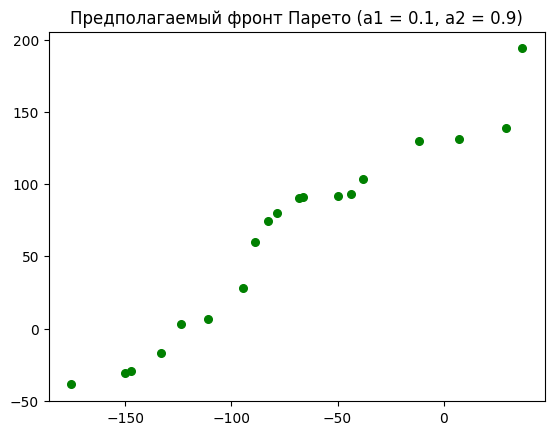

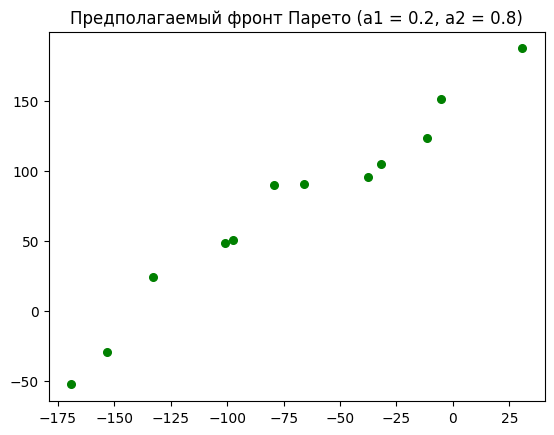

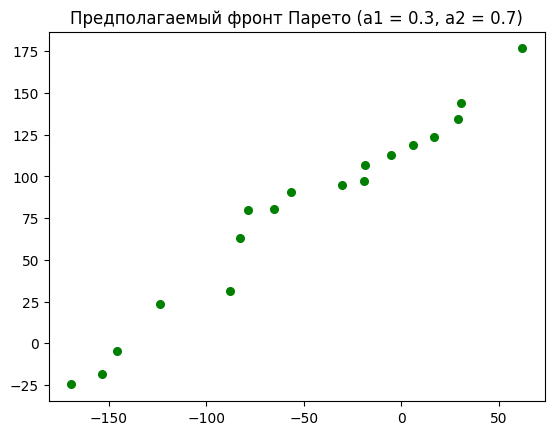

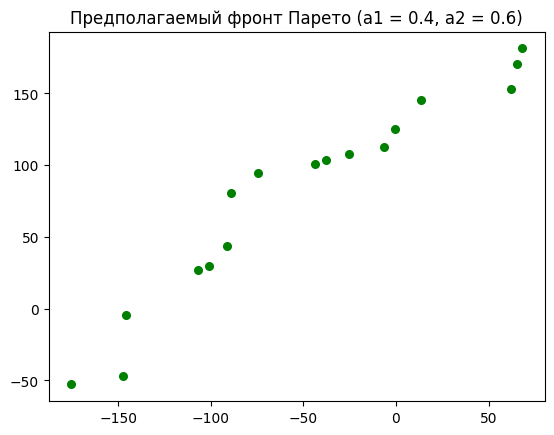

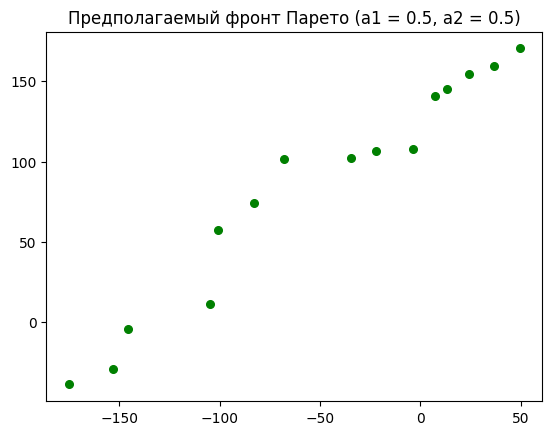

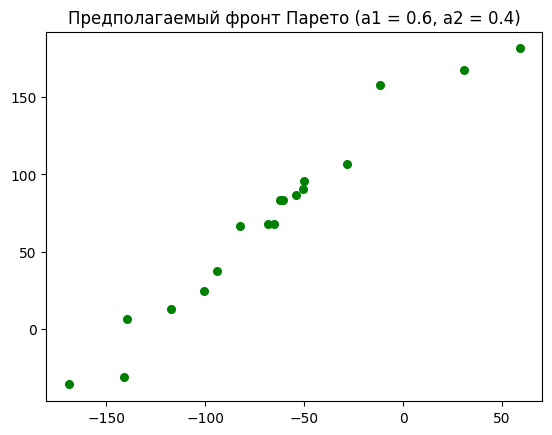

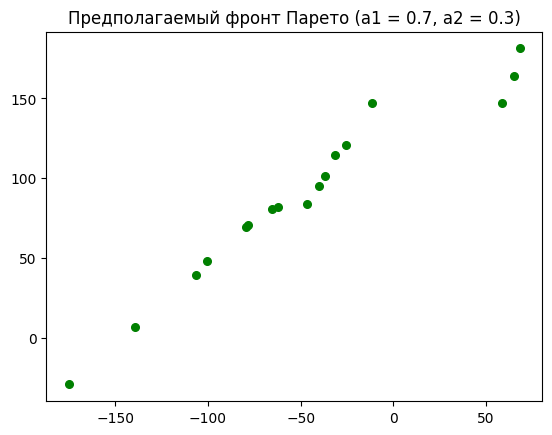

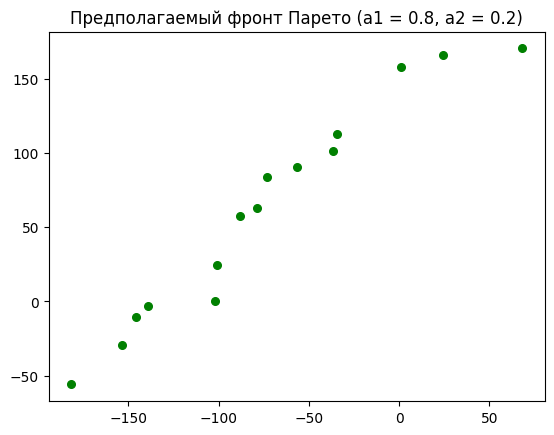

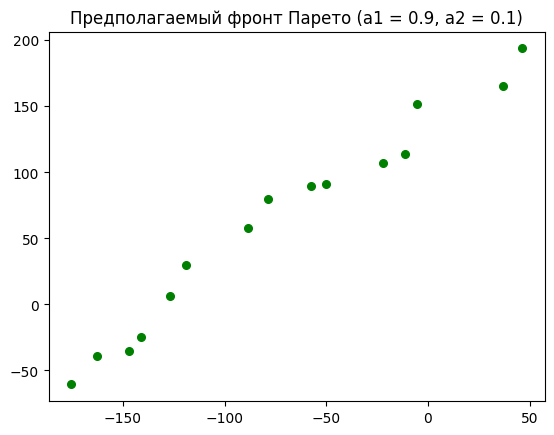

In [8]:
for i in range(9):
    f_opt_1 = []
    f_opt_2 = []
    for j in range(len(opt_pareto[i])):
        f_opt_1.append(f(opt_pareto[i][j])[0])
        f_opt_2.append(f(opt_pareto[i][j])[1])
    plt.plot(f_opt_1[:], f_opt_2[:], '.g', markersize=11)
    plt.title(f"Предполагаемый фронт Парето (a1 = {round((i+1)*0.1,1)}, a2 = {round((9-i)*0.1,1)})")
    plt.show()

In [9]:
roy = [[4.1829,  5.2647, -1.9108,  5.5764],[0.6123, -2.8016, -2.5991, 9.6073],[-0.3904, -4.325, -2.2649,  8.2511],[-0.4824,  3.7636,  0.5324,  4.6389],[-0.8419, -3.473,  0.6694,   5.1849],[0.4878, -1.8592,  0.755,  5.0374],[0.01, -0.006, -3.6055,  9.2191],[-1.1956, -2.4452, -3.3332,  6.7584],[-6.0464,  1.6494, -3.2997,  7.1301]]

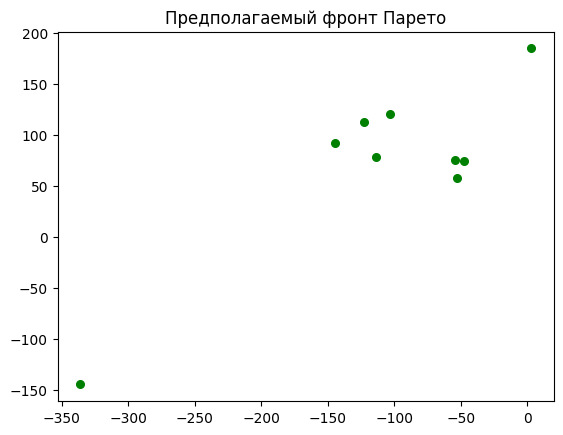

In [10]:
f_opt_1 = []
f_opt_2 = []
for i in range(9):
    f_opt_1.append(f(roy[i])[0])
    f_opt_2.append(f(roy[i])[1])
plt.plot(f_opt_1[:], f_opt_2[:], '.g', markersize=11)
plt.title(f"Предполагаемый фронт Парето")
plt.show()